In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

from sklearn import set_config; set_config(display='diagram')


In [46]:
path = "../../raw_data/samples/sample_dataset_10000_enriched.csv"
df = pd.read_csv(path)
df.shape

(5720, 15)

<Axes: xlabel='generated', ylabel='pourcentage_of_correct_prediction'>

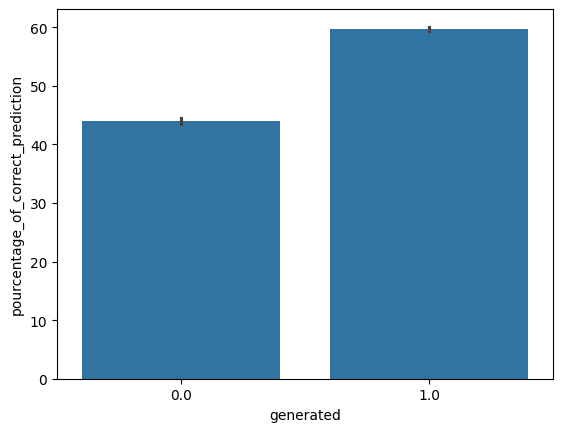

In [47]:
sns.barplot(data=df, x="generated", y="pourcentage_of_correct_prediction")

In [43]:
sns.scatterplot(data=df, x="text_corrections_ratio", y="pourcentage_of_correct_prediction", hue="generated")

ValueError: Could not interpret value `text_corrections_ratio` for `x`. An entry with this name does not appear in `data`.

In [14]:
df[['generated', 'pourcentage_of_correct_prediction', 'number_of_test']].corr()


,generated,pourcentage_of_correct_prediction,number_of_test
generated,1.000000,0.468354,-0.149839
pourcentage_of_correct_prediction,0.468354,1.000000,-0.106117
number_of_test,-0.149839,-0.106117,1.000000


In [44]:
from detect_ai_content.ml_logic.preprocess import preprocess
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
X = pd.DataFrame(data=preprocess(df, auto_enrich=False))
X['pourcentage_of_correct_prediction'] = df['pourcentage_of_correct_prediction']
print(X)
X.columns = X.columns.astype(str)
y = df['generated']
results = cross_validate(estimator=model, X=X, y=y, cv=5)
print(results)

             0         1         2         3         4  \
0     0.237709 -0.646670 -0.922428 -0.237312 -0.431974   
1     0.565617 -0.321033 -0.617257 -0.248961 -1.097924   
2    -0.234631  0.217454  0.740899 -0.359543  0.213710   
3    -0.067351 -0.932349  2.325501  1.364799 -1.428929   
4    -0.470993  0.713402  0.905459 -0.309917 -0.227326   
...        ...       ...       ...       ...       ...   
4765  0.145945  0.988987 -0.614440 -0.848615  0.367532   
4766  0.694193  0.099202  0.321728  1.711177  0.424656   
4767 -0.014219  0.163510  0.141747 -0.529449 -0.027768   
4768 -0.112105 -0.000341  0.535090 -0.427038 -2.382675   
4769 -0.400419  0.015912 -0.088454 -0.119281  0.424656   

      pourcentage_of_correct_prediction  
0                                    50  
1                                    58  
2                                    57  
3                                    20  
4                                    37  
...                                 ...  
4765     

In [54]:
path = "../../raw_data/huggingface.co_human_ai_generated_text/model_training_dataset_enriched.csv"
df_enriched = pd.read_csv(path)
df_enriched.shape

(2000000, 11)

In [93]:
path = "../../raw_data/huggingface.co_human_ai_generated_text/model_training_dataset.csv"
df = pd.read_csv(path)
df.shape

FileNotFoundError: [Errno 2] No such file or directory: '../../raw_data/huggingface.co_human_ai_generated_text/model_training_dataset.csv'

In [92]:
sum(df['ai_text'].duplicated())

KeyError: 'ai_text'

In [63]:
df.columns

Index(['id', 'human_text', 'ai_text', 'instructions'], dtype='object')

In [66]:
human_texts_df=df[['human_text']]
print(human_texts_df.shape)

human_texts_df=human_texts_df[human_texts_df.duplicated()==False]
print(human_texts_df.shape)


(1000000, 1)
(817018, 1)


In [68]:
ai_texts_df=df[['ai_text']]
print(ai_texts_df.shape)

ai_texts_df=ai_texts_df[ai_texts_df.duplicated()==False]
print(ai_texts_df.shape)


(1000000, 1)
(872919, 1)


In [72]:
human_texts_df['generated'] = 0
human_texts_df = human_texts_df.rename(columns={'human_text':"text"})
ai_texts_df['generated'] = 1
ai_texts_df = ai_texts_df.rename(columns={'ai_text':"text"})


In [70]:
path = "../../raw_data/kaggle-ai-generated-vs-human-text/AI_Human.csv"
df = pd.read_csv(path)
df.shape

(487235, 2)

In [71]:
df.columns

Index(['text', 'generated'], dtype='object')

In [75]:
AI_Human_df = df

In [76]:
path = "../../raw_data/daigt-v2-train-dataset/train_v2_drcat_02.csv"
df = pd.read_csv(path)
df.shape

(44868, 5)

In [77]:
df.columns

Index(['text', 'label', 'prompt_name', 'source', 'RDizzl3_seven'], dtype='object')

In [ ]:
daigt_v2_df = df[['text']]
daigt_v2_df['generated']=1


/var/folders/w3/qw2jyvk969dfytk5fljg_98h0000gp/T/ipykernel_83743/874405269.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daigt_v2_df['generated']=1
/var/folders/w3/qw2jyvk969dfytk5fljg_98h0000gp/T/ipykernel_83743/874405269.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daigt_v2_df['source']='daigt-v2-train-dataset/train_v2_drcat_02'


In [87]:
daigt_v2_df['source']='daigt-v2-train-dataset/train_v2_drcat_02.csv'
AI_Human_df['source']='kaggle-ai-generated-vs-human-text/AI_Human.csv'
ai_texts_df['source']='huggingface.co_human_ai_generated_text/model_training_dataset.csv'
human_texts_df['source']='huggingface.co_human_ai_generated_text/model_training_dataset.csv'


/var/folders/w3/qw2jyvk969dfytk5fljg_98h0000gp/T/ipykernel_83743/308328999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daigt_v2_df['source']='daigt-v2-train-dataset/train_v2_drcat_02.csv'


In [88]:
big_df = pd.concat(objs=[human_texts_df, ai_texts_df, AI_Human_df, daigt_v2_df])

In [90]:
big_df.shape

(2222040, 3)

In [104]:
big_df = big_df.sample(frac=1)
big_df.to_csv("../../raw_data/texts_merged_dataset.csv")

KeyboardInterrupt: 

In [ ]:

1000000 - 872919

127081

In [5]:
import pandas as pd
test_df = pd.read_csv("../../raw_data/texts_merged_dataset_enriched.csv")

<Axes: xlabel='generated', ylabel='pourcentage_of_correct_prediction'>

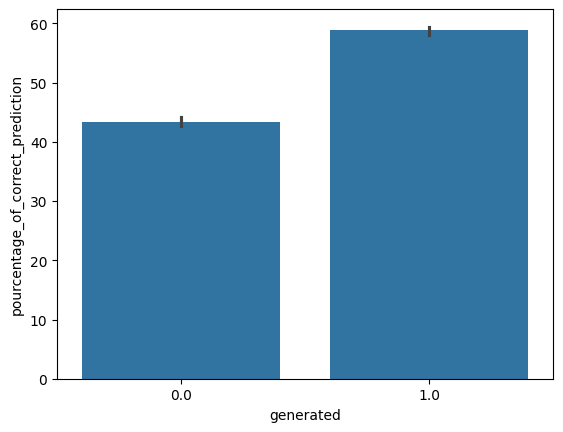

In [6]:
import seaborn as sns
sns.barplot(data=test_df, x="generated", y="pourcentage_of_correct_prediction")